In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
dir_path = 'C:/Users/francis/Machine_Learning/francis/Documents/GitHub/4th-ML100Days/data/'

f_app = os.path.join(dir_path + 'application_train.csv')
print('Path of read in data is %s' %(f_app))
app_train = pd.read_csv(f_app)

Path of read in data is C:/Users/francis/Machine_Learning/francis/Documents/GitHub/4th-ML100Days/data/application_train.csv


In [4]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


請參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因

Number of remain columns is 65


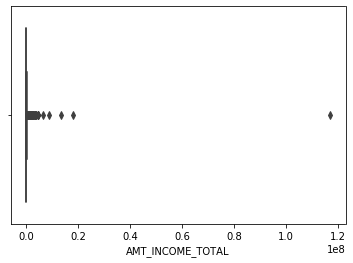

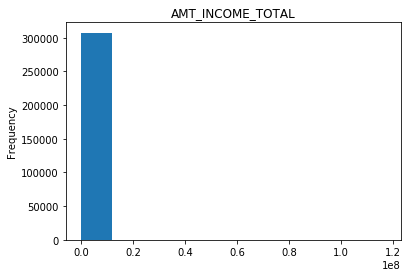

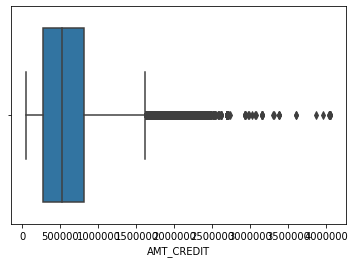

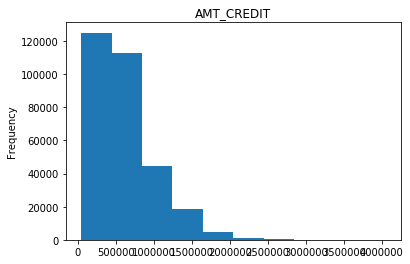

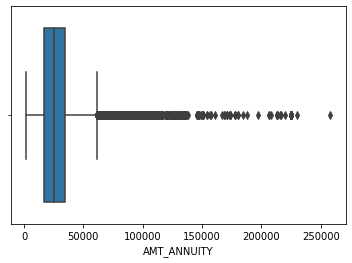

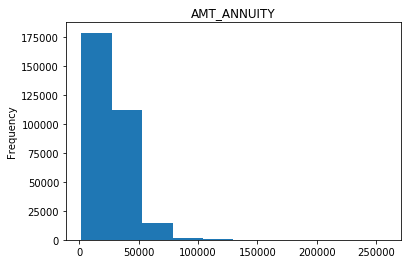

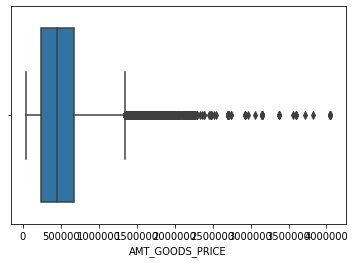

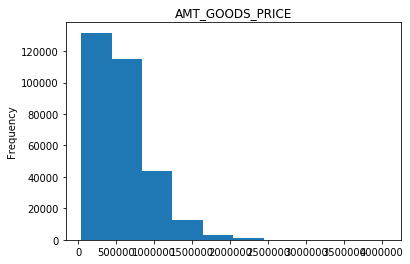

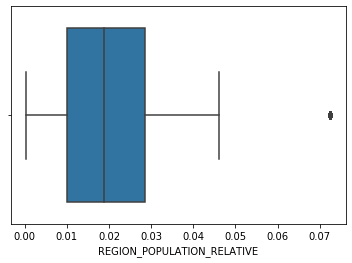

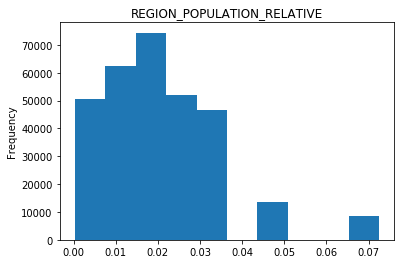

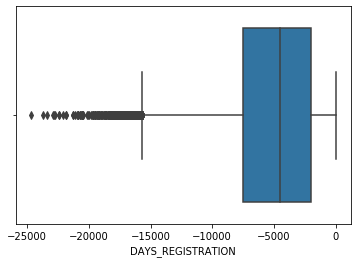

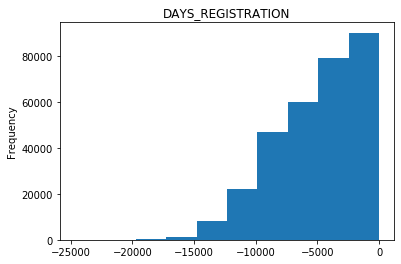

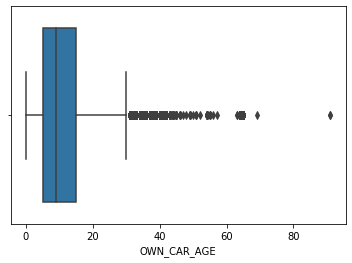

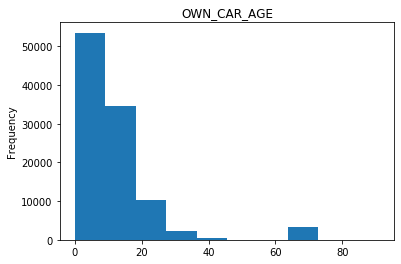

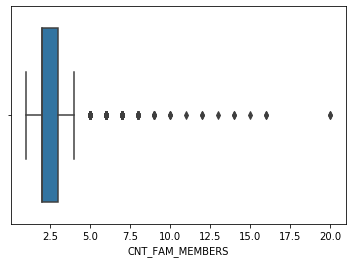

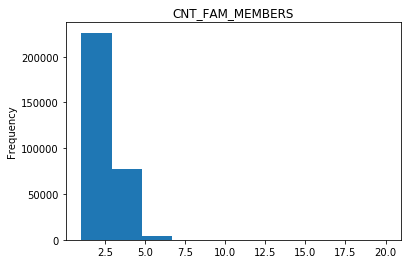

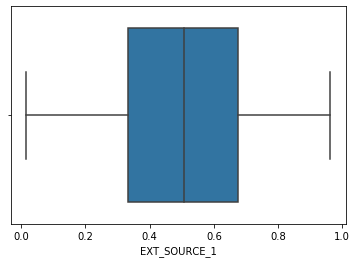

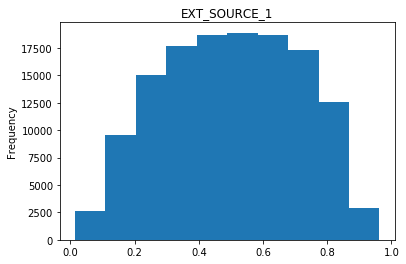

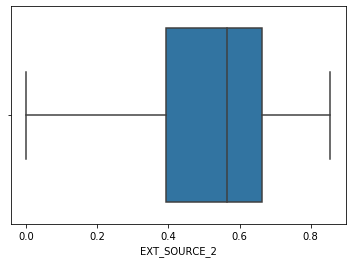

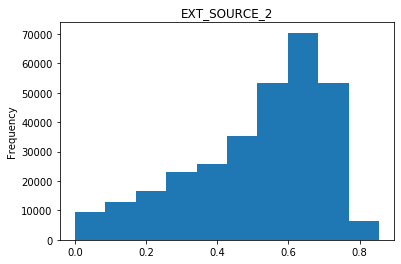

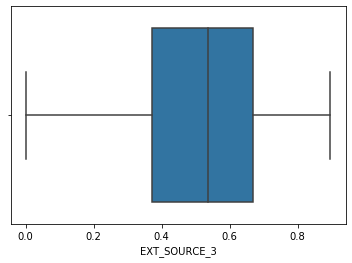

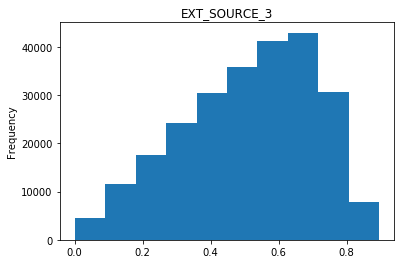

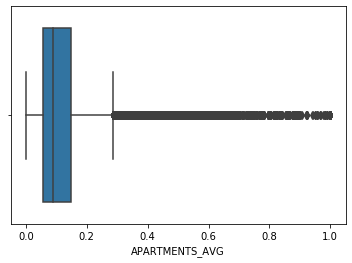

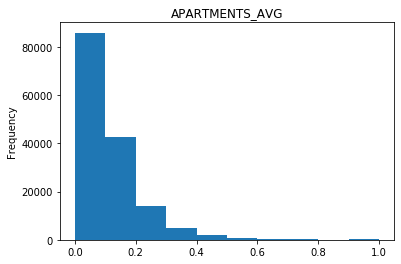

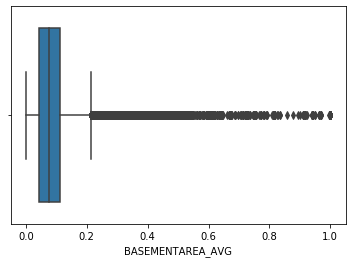

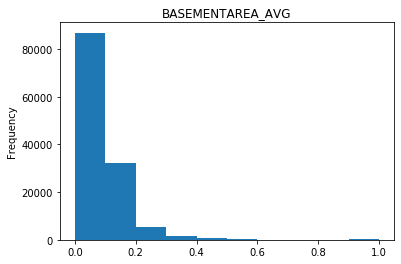

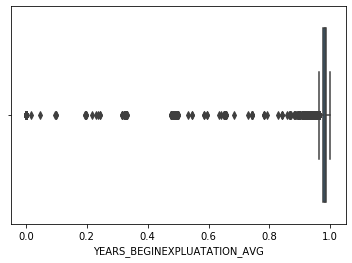

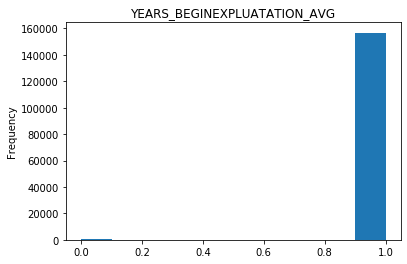

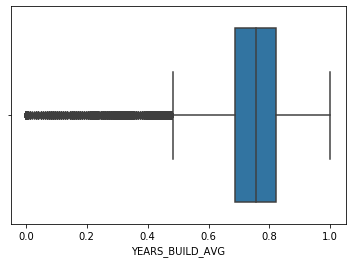

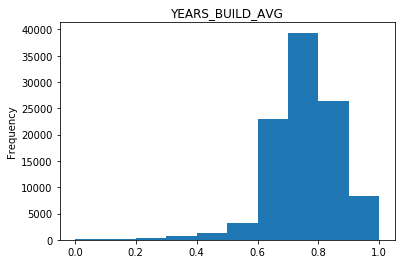

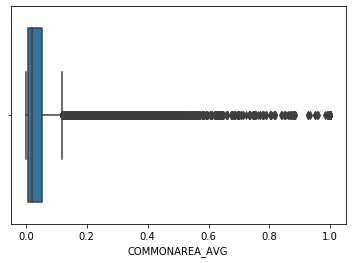

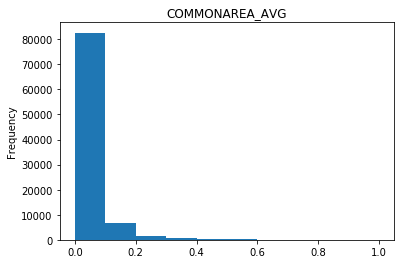

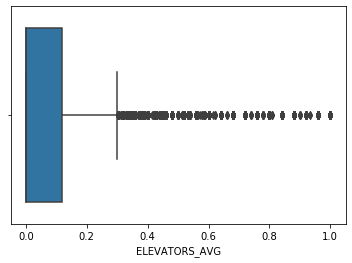

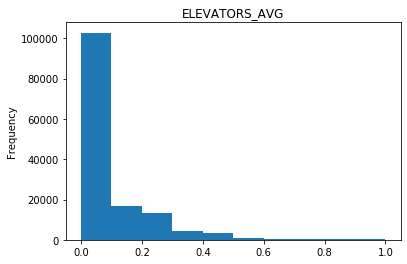

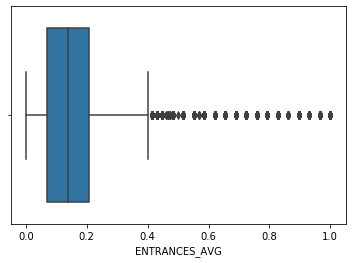

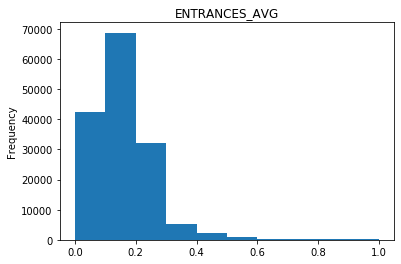

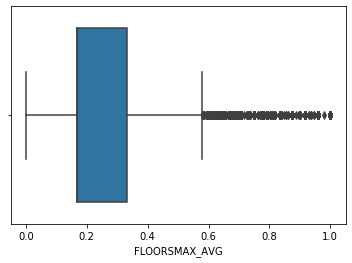

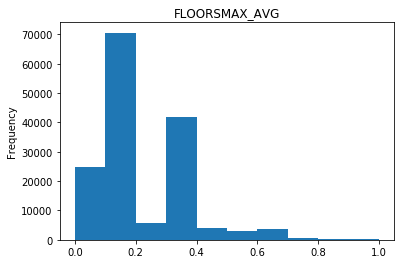

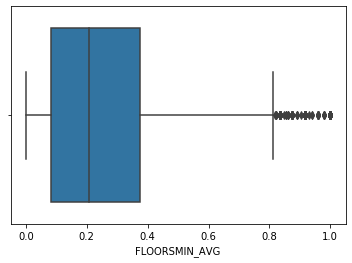

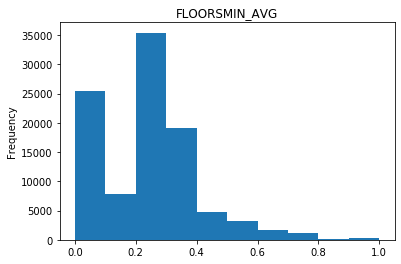

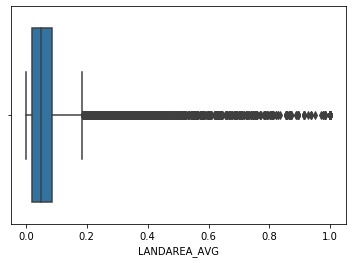

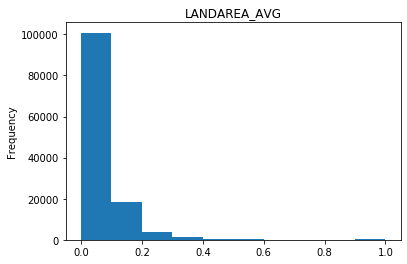

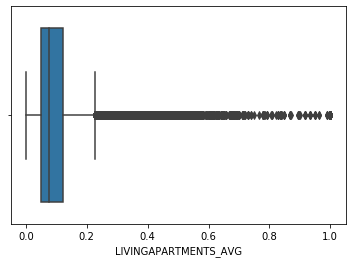

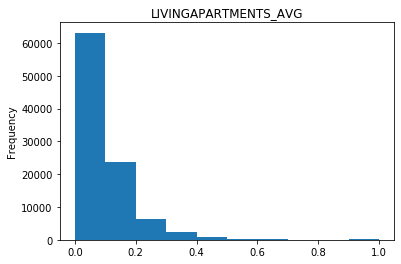

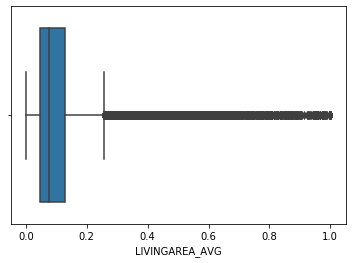

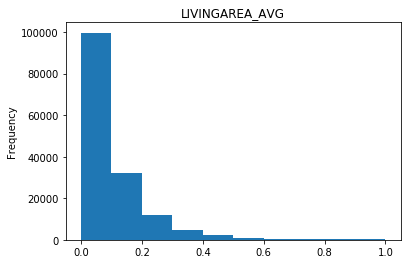

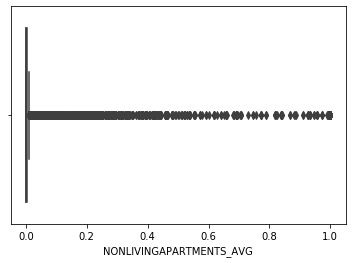

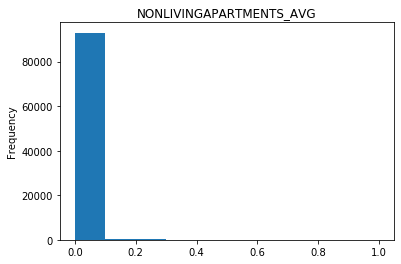

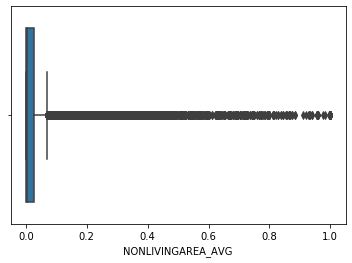

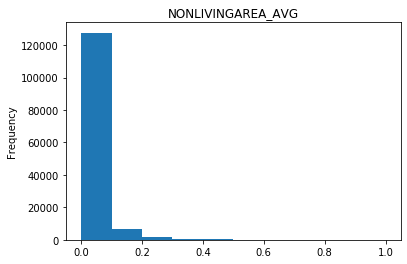

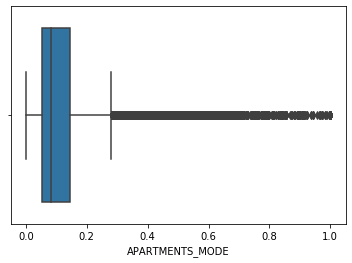

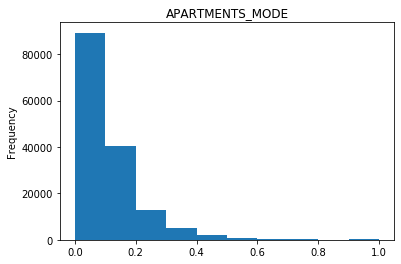

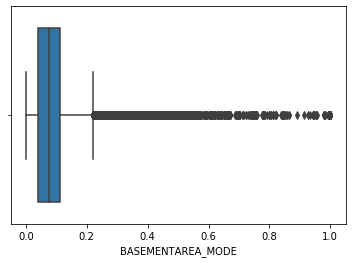

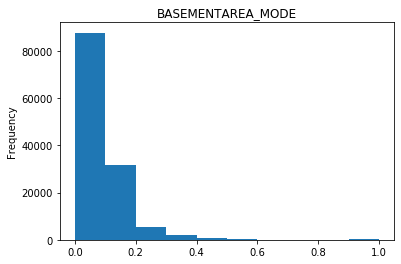

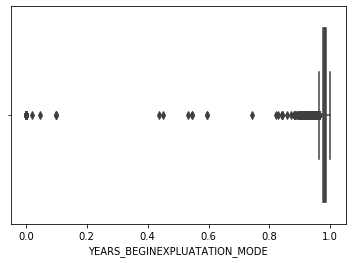

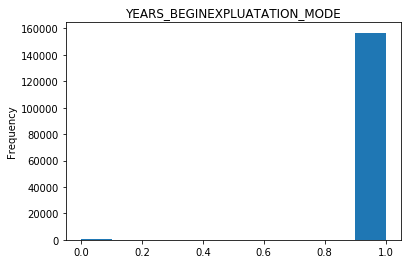

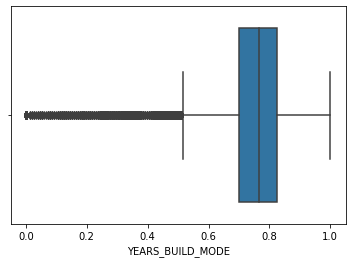

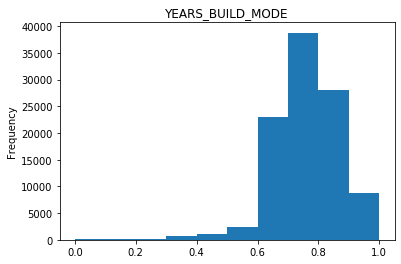

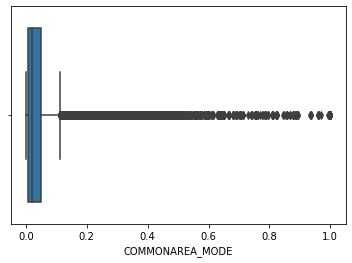

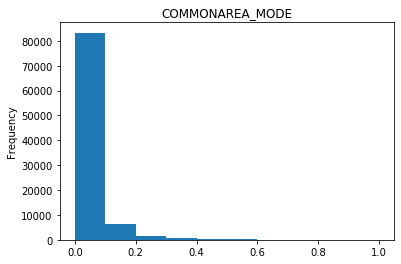

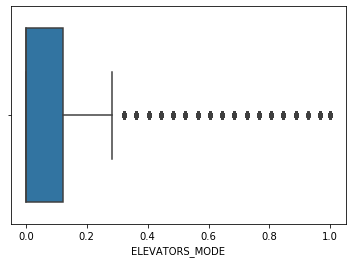

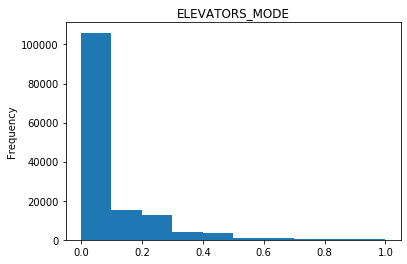

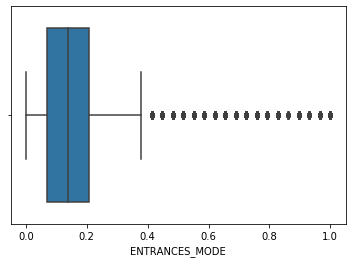

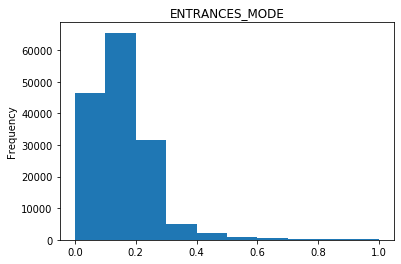

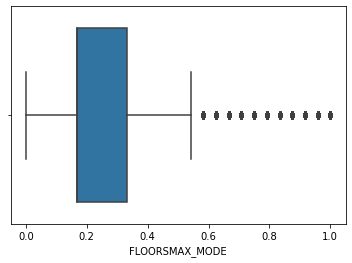

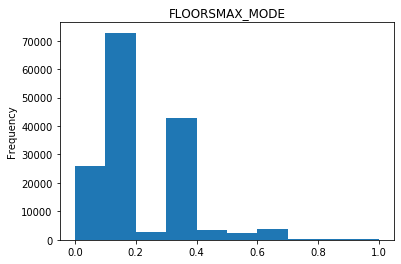

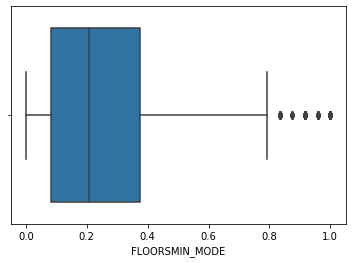

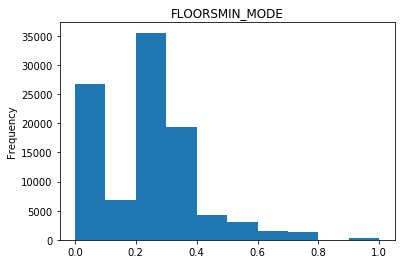

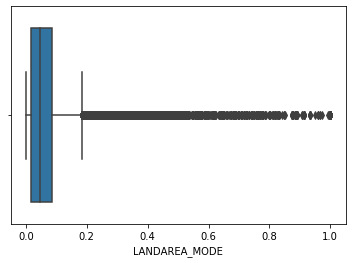

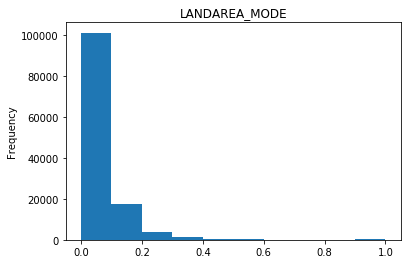

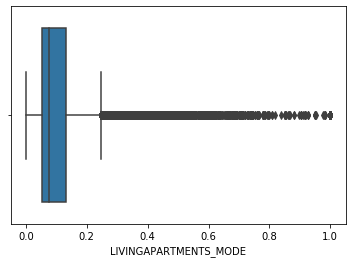

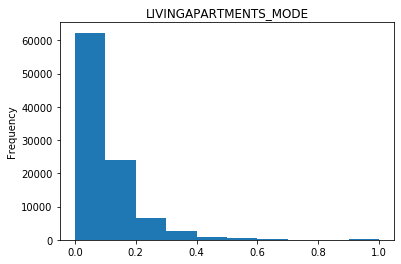

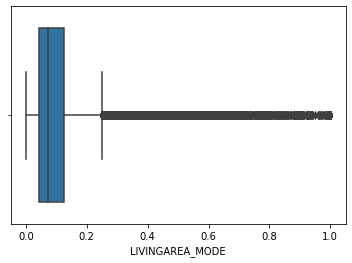

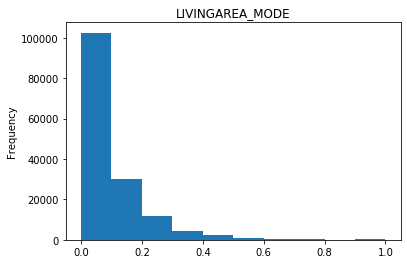

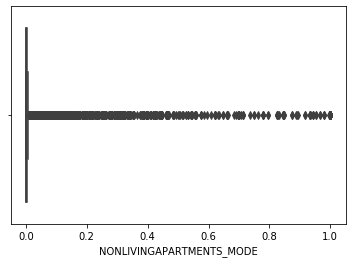

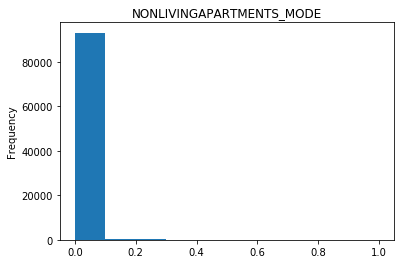

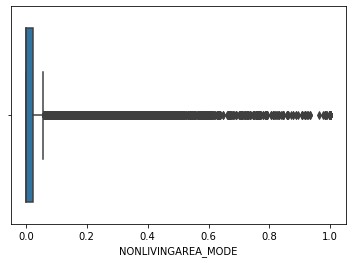

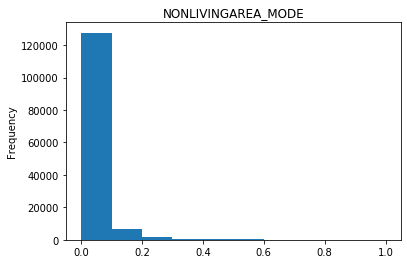

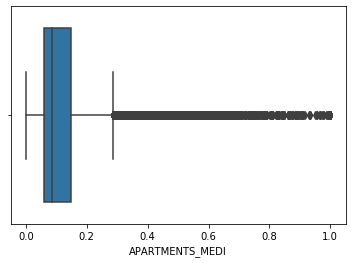

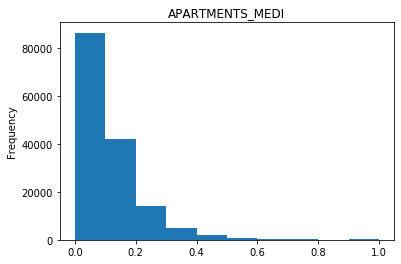

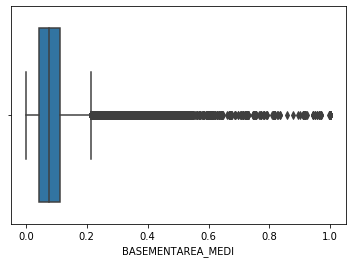

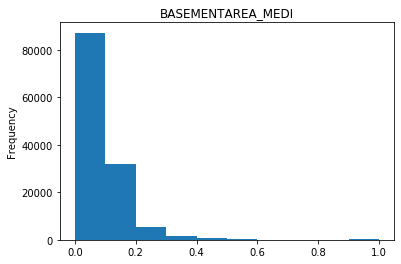

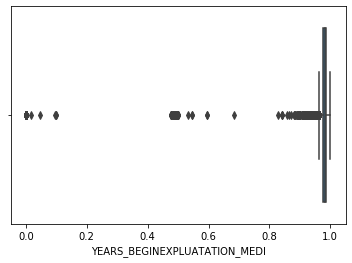

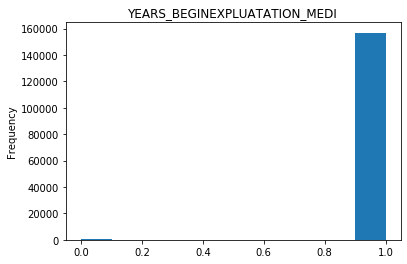

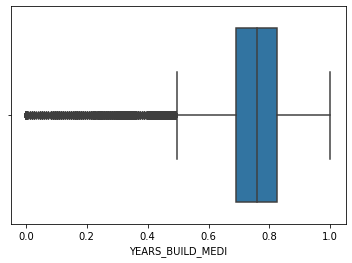

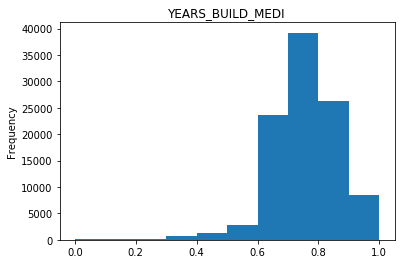

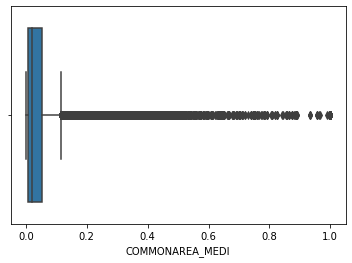

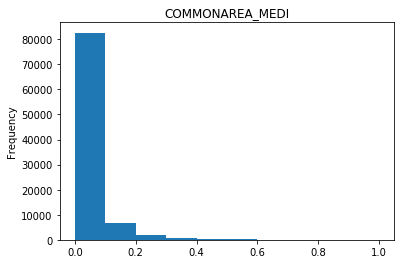

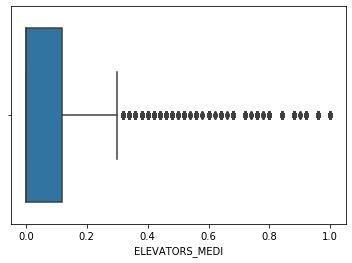

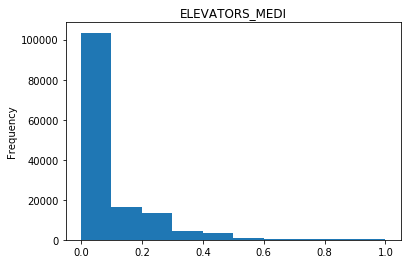

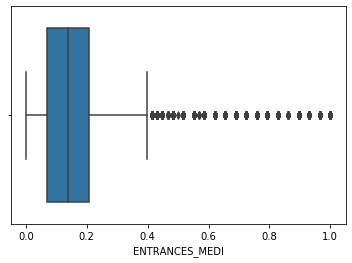

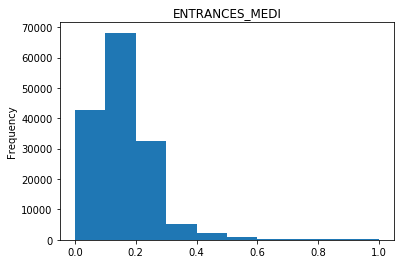

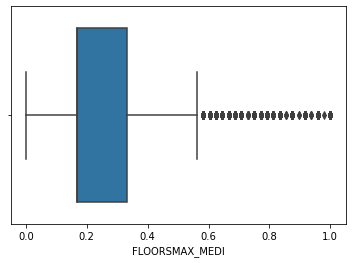

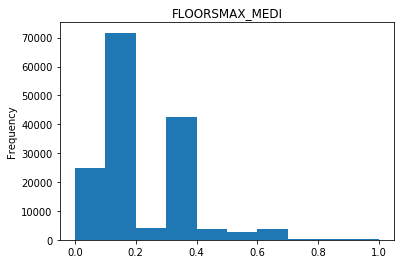

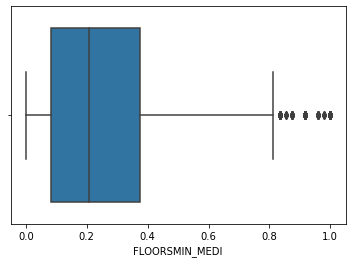

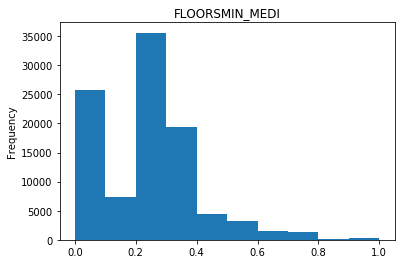

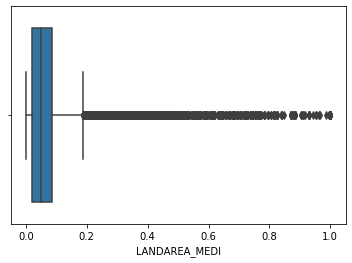

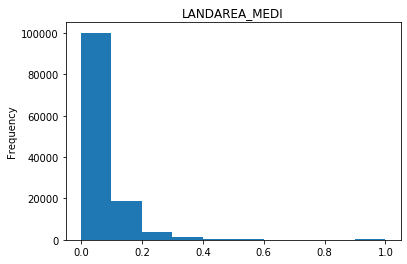

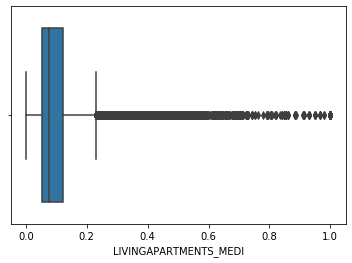

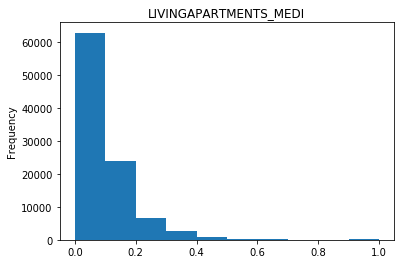

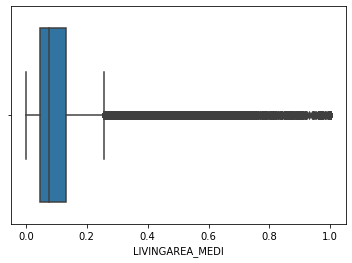

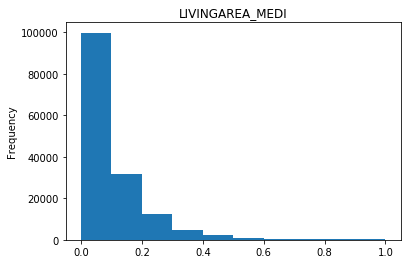

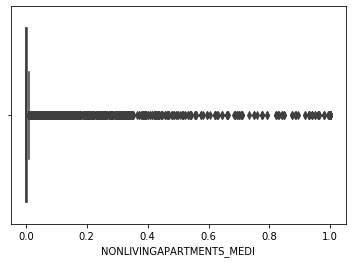

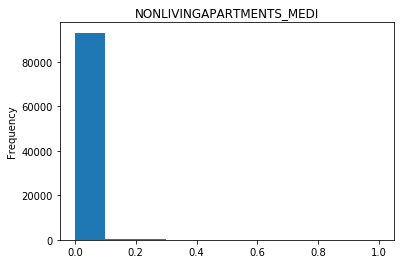

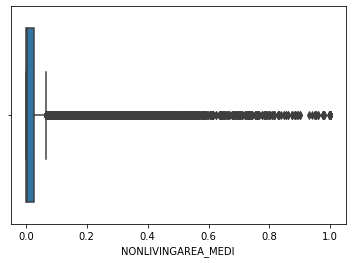

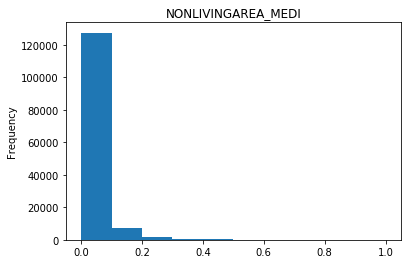

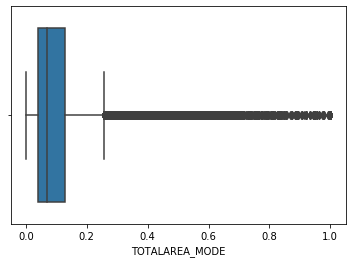

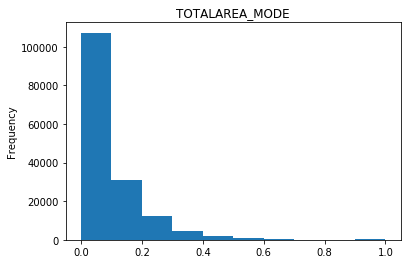

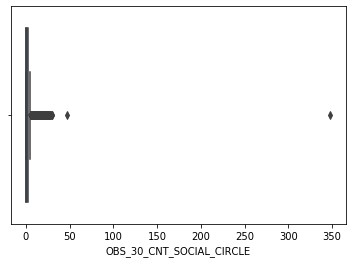

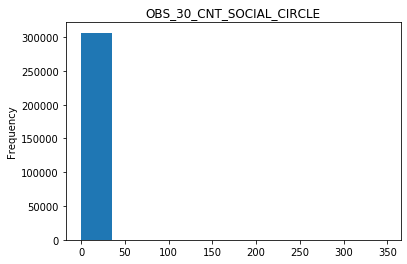

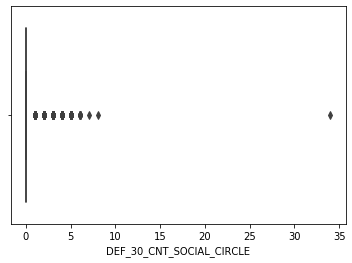

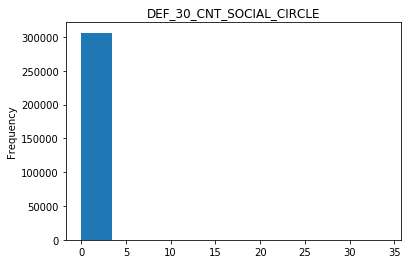

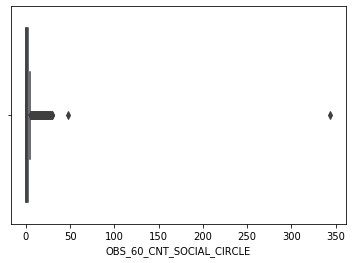

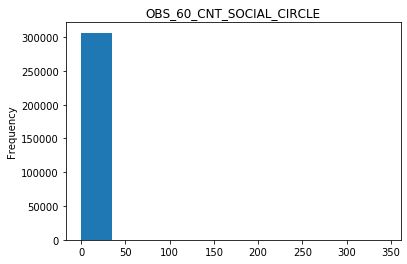

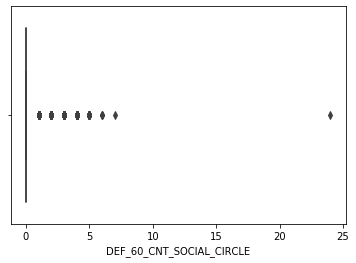

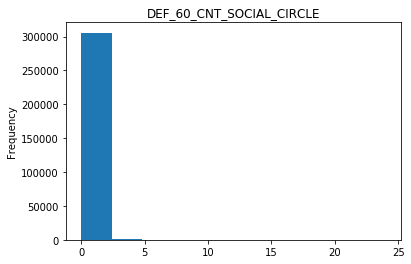

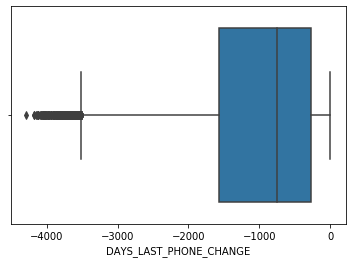

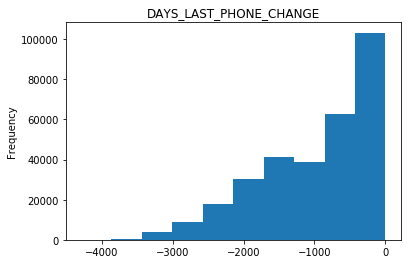

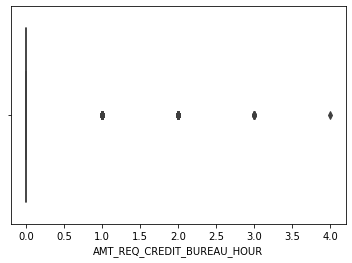

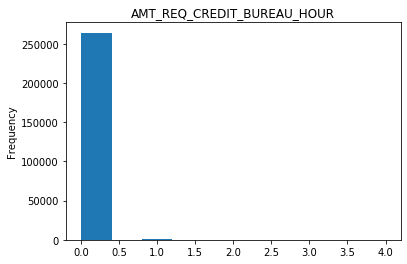

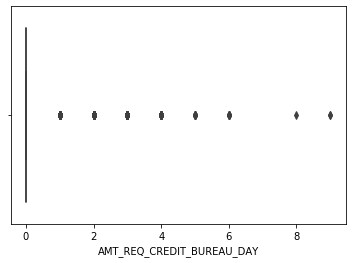

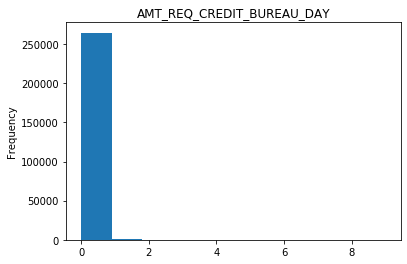

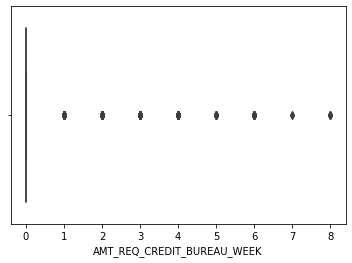

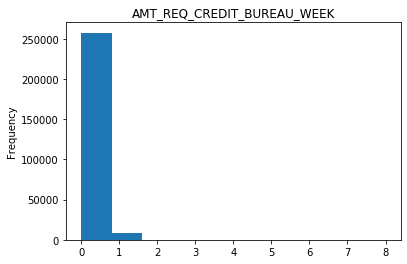

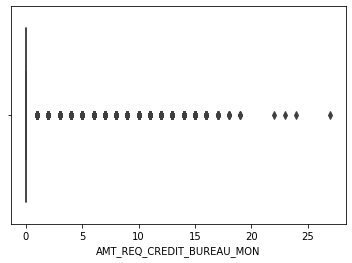

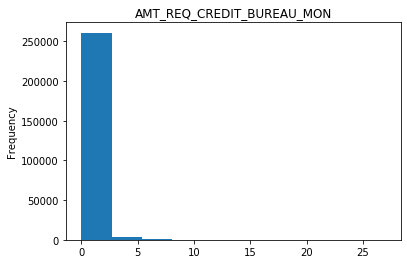

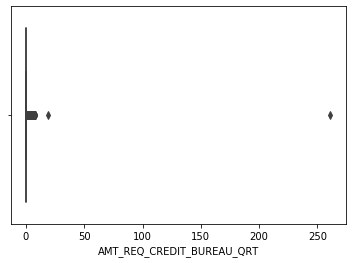

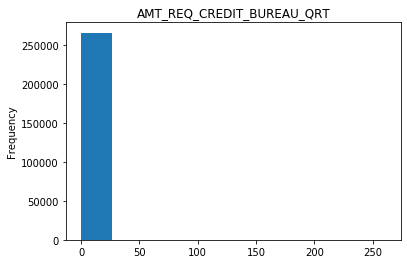

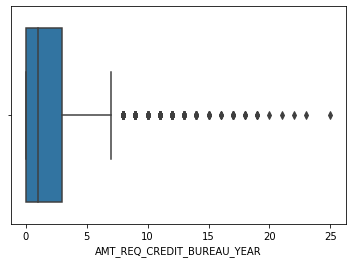

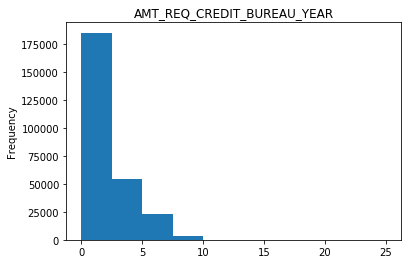

In [5]:
# 先篩選數值型的欄位
#因為 isin 函數中只能放進 list，所以先建立一個 list
select_columns = ['float64']

numerical_columns =list(app_train.columns[list(app_train.dtypes.isin(select_columns))])
# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numerical_columns=list(app_train[numerical_columns].columns[list(app_train[numerical_columns].apply(lambda x: x.nunique() != 2))])
print('Number of remain columns is %i' %len(numerical_columns))
#檢視這些欄位的數值範圍
#import 可以製造出箱型圖的函式
import seaborn as sns

for col in numerical_columns:
    sns.boxplot(x = app_train[col])
    plt.show()
    app_train[col].plot.hist(title = col)
    plt.show()

從上面的圖型，我們可以有個依據去推斷欄位是否有存在離群值的可能

接著使用 ECDF 來進一步證明是否為離群值

In [80]:
app_train.AMT_INCOME_TOTAL.value_counts().sort_index().cumsum()

25650.0             2
26100.0             5
26460.0             6
26550.0             8
27000.0            74
                ...  
6750000.0      307507
9000000.0      307508
13500000.0     307509
18000090.0     307510
117000000.0    307511
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: int64

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


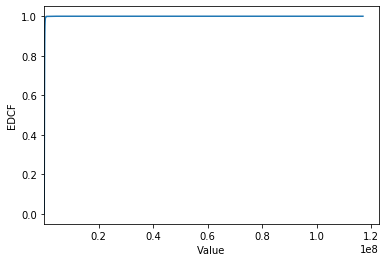

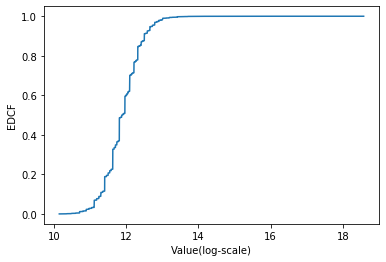

In [81]:
# 最大值離平均與中位數很遠
print(app_train['AMT_INCOME_TOTAL'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)

cdf = app_train.AMT_INCOME_TOTAL.value_counts().sort_index().cumsum()

plt.plot(list(cdf.index),cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('EDCF')
plt.xlim(cdf.index.min(),cdf.index.max()*1.05)
plt.ylim(-0.05,1.05)
plt.show()

#調整x的規模,將其轉成log x
plt.plot(np.log(list(cdf.index)),cdf/cdf.max())
plt.xlabel('Value(log-scale)')
plt.ylabel('EDCF')
plt.ylim(-0.05,1.05)
plt.show()

0         0.018801
1         0.003541
2         0.010032
3         0.008019
4         0.028663
            ...   
307506    0.032561
307507    0.025164
307508    0.005002
307509    0.005313
307510    0.046220
Name: REGION_POPULATION_RELATIVE, Length: 307511, dtype: float64
count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


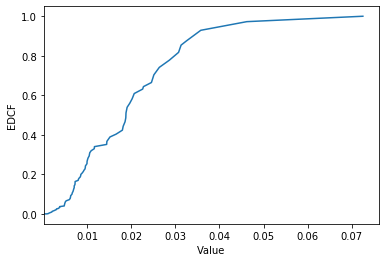

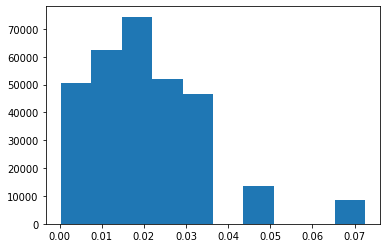

0.035792    16408
0.046220    13442
0.030755    12163
0.025164    11950
0.026392    11601
            ...  
0.001417      467
0.001333      235
0.000533       39
0.000938       28
0.000290        2
Name: REGION_POPULATION_RELATIVE, Length: 81, dtype: int64

In [83]:
#地區人口密集度
print(app_train['REGION_POPULATION_RELATIVE'])
print(app_train['REGION_POPULATION_RELATIVE'].describe())

cdf_rn = app_train.REGION_POPULATION_RELATIVE.value_counts().sort_index().cumsum()

#做ecdf圖
plt.plot(list(cdf_rn.index) ,cdf_rn/cdf_rn.max())
plt.xlabel('Value')
plt.ylabel('EDCF')
plt.xlim(cdf_rn.index.min() , cdf_rn.index.max()*1.05)
plt.ylim(-0.05,1.05)
plt.show()

#做直方圖
plt.hist(app_train['REGION_POPULATION_RELATIVE'])
plt.show()

#找出每個數職的數量
app_train['REGION_POPULATION_RELATIVE'].value_counts()
#可發現有少數數據掉在分布之外，但僅只是代表這間公司在人口密度較高的地方設廠數較少，並不代表是異常值

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


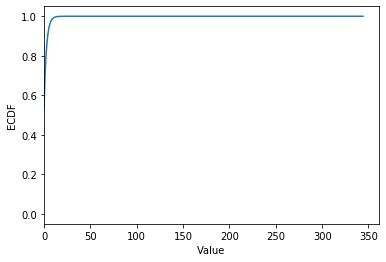

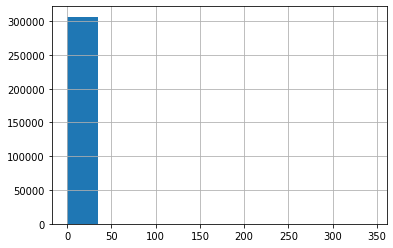

344.0         1
47.0          1
30.0          1
29.0          2
28.0          1
27.0          5
26.0          1
25.0         11
24.0         12
23.0         13
22.0         20
21.0         28
20.0         30
19.0         44
18.0         49
17.0         73
16.0        137
15.0        166
14.0        238
13.0        401
12.0        620
11.0        837
10.0       1335
9.0        1959
8.0        2886
7.0        4344
6.0        6349
5.0        9463
4.0       13946
3.0       20215
2.0       29766
1.0       48870
0.0      164666
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64


In [89]:
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

#製作ECDF
cdf = app_train.OBS_60_CNT_SOCIAL_CIRCLE.value_counts().sort_index().cumsum()

plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min() * 0.95, cdf.index.max() * 1.05])
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()
print(app_train.OBS_60_CNT_SOCIAL_CIRCLE.value_counts().sort_index(ascending = False))#ascending = False代表

注意：當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。這時可以考慮用 value_counts 去找到這些數值

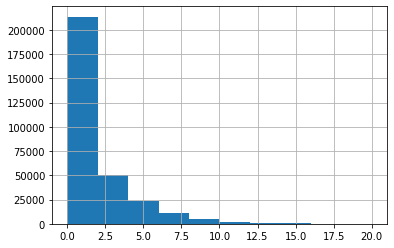

In [145]:
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製
app_train.index = list(app_train.OBS_60_CNT_SOCIAL_CIRCLE)
app_train = app_train.sort_index()

a =app_train.OBS_60_CNT_SOCIAL_CIRCLE.value_counts().sort_index().cumsum()

loc_a = list(np.arange(start = 0,stop = 21))
loc_b = 'OBS_60_CNT_SOCIAL_CIRCLE'
app_train.loc[loc_a,loc_b].hist()
plt.show()